In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


*Denoising Image CNN*

In [ ]:
!pip install tqdm rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# %%capture
# !unzip /content/drive/MyDrive/data.zip 

In [ ]:
import cv2 
import numpy as np
from tqdm import tqdm
from rich import print as rprint
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Conv2DTranspose, BatchNormalization, Dropout, Activation
from tensorflow.keras.models import Model

In [ ]:
import os 

In [ ]:
!git clone https://github.com/Arunprakaash/adversial-attacks-defense.git

Cloning into 'adversial-attacks-defense'...
remote: Enumerating objects: 1830, done.
remote: Total 1830 (delta 0), reused 0 (delta 0), pack-reused 1830
Receiving objects: 100% (1830/1830), 185.49 MiB | 23.84 MiB/s, done.
Updating files: 100% (2929/2929), done.


In [ ]:
classes = os.listdir('/content/adversial-attacks-defense/data')
classes

['original', 'attacked']

In [ ]:
def read_attacked(filepath):
  data =[]
  for i in tqdm(range(556)):
    data.append(read_image(filepath+ '/' + f'{i}.png'))
  return np.array(data)
    

In [ ]:
def read_original(filepath):
  data =[]
  for i in tqdm(range(556)):
    data.append(read_image(filepath+ '/' + f'{i}_original.png'))
  return np.array(data)
    

In [ ]:
def read_image(filepath):
  image = cv2.imread(filepath)
  image = cv2.resize(image,(250,250),interpolation = cv2.INTER_AREA)
  return image

In [ ]:

original = '/content/adversial-attacks-defense/data/original'
attacked = '/content/adversial-attacks-defense/data/attacked'


In [ ]:
X = read_attacked(attacked)

100%|██████████| 556/556 [00:01<00:00, 319.18it/s]


In [ ]:
X.shape

(556, 250, 250, 3)

In [ ]:
y = read_original(original)

100%|██████████| 556/556 [00:02<00:00, 222.79it/s]


In [ ]:
y.shape

(556, 250, 250, 3)

In [ ]:
# def preprocess_img(data):
#     lis = []
#     for i in data:
#         image = cv2.resize(i,(250,250),interpolation = cv2.INTER_AREA)
#         lis.append(image)
#     lis = np.array(lis)
#     return lis

In [ ]:
X.shape

(556, 250, 250, 3)

In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
y.shape

(556, 250, 250, 3)

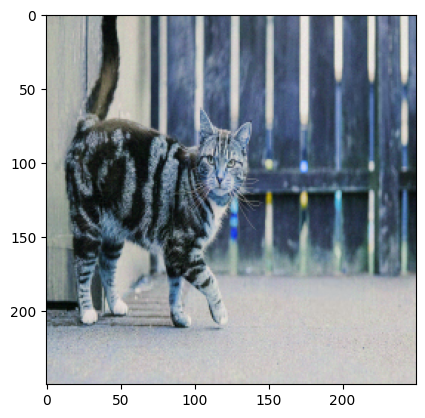

In [ ]:
plt.imshow(X[0])
plt.show()

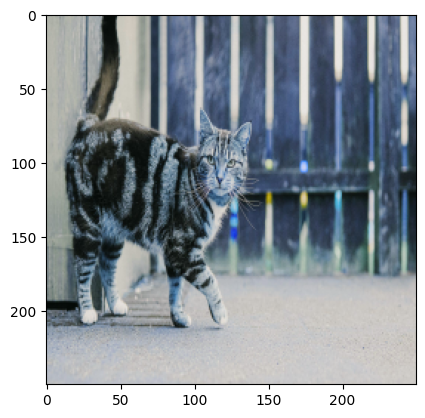

In [ ]:
plt.imshow(y[0])
plt.show()

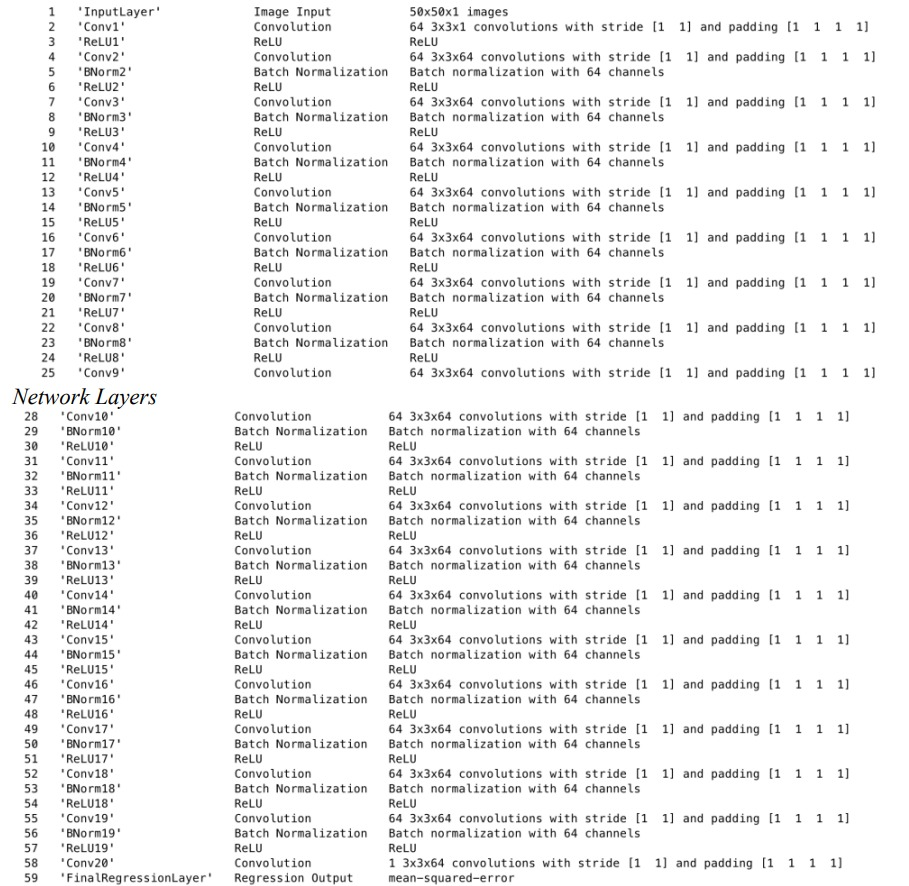

In [ ]:
# let's write denoising CNN model
def denoiser():
    model = tf.keras.Sequential()
    #block -1 
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', input_shape=(250, 250, 3), name='conv1'))
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', input_shape=(250, 250, 3), name='conv2'))
    
    #batch normalization
    model.add(BatchNormalization(name='bn1'))
    model.add(Activation('relu'))
    
    #block -2
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv3'))
    model.add(BatchNormalization(name='bn2'))
    model.add(Activation('relu'))
    
    #block -3 to -7 repeat block -2
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv4'))
    model.add(BatchNormalization(name='bn3'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv5'))
    model.add(BatchNormalization(name='bn4'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv6'))
    model.add(BatchNormalization(name='bn5'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv7'))
    model.add(BatchNormalization(name='bn6'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv8'))
    model.add(BatchNormalization(name='bn7'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv9'))
    model.add(BatchNormalization(name='bn8'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv10'))
    model.add(BatchNormalization(name='bn9'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv11'))
    model.add(BatchNormalization(name='bn10'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv12'))
    model.add(BatchNormalization(name='bn11'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv13'))
    model.add(BatchNormalization(name='bn12'))
    model.add(Activation('relu'))
    
        
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv14'))
    model.add(BatchNormalization(name='bn13'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv15'))
    model.add(BatchNormalization(name='bn14'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv16'))
    model.add(BatchNormalization(name='bn15'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv17'))
    model.add(BatchNormalization(name='bn16'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv18'))
    model.add(BatchNormalization(name='bn17'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv19'))
    model.add(BatchNormalization(name='bn18'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(3, (3, 3), activation='relu', strides = (1,1), padding='same', name='conv20'))
    
    # add regression layer in regression output 
    model.add(Activation('linear'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    
    print(model.summary())
    return model


In [ ]:
denoise = denoiser()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 250, 250, 64)      1792      
                                                                 
 conv2 (Conv2D)              (None, 250, 250, 64)      36928     
                                                                 
 bn1 (BatchNormalization)    (None, 250, 250, 64)      256       
                                                                 
 activation (Activation)     (None, 250, 250, 64)      0         
                                                                 
 conv3 (Conv2D)              (None, 250, 250, 64)      36928     
                                                                 
 bn2 (BatchNormalization)    (None, 250, 250, 64)      256       
                                                                 
 activation_1 (Activation)   (None, 250, 250, 64)      0

In [ ]:
denoise.fit(X, y, batch_size=4, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
111/111 [==============================] - 67s 336ms/step - loss: 19597.3340 - mean_squared_error: 19597.3320 - val_loss: 114311.8125 - val_mean_squared_error: 114311.8047
Epoch 2/100
111/111 [==============================] - 38s 341ms/step - loss: 8913.4473 - mean_squared_error: 8913.4473 - val_loss: 134787.9219 - val_mean_squared_error: 134787.9062
Epoch 3/100
111/111 [==============================] - 39s 351ms/step - loss: 4057.0591 - mean_squared_error: 4057.0586 - val_loss: 19749.5469 - val_mean_squared_error: 19749.5469
Epoch 4/100
111/111 [==============================] - 39s 348ms/step - loss: 2458.2727 - mean_squared_error: 2458.2729 - val_loss: 15687.1924 - val_mean_squared_error: 15687.1904
Epoch 5/100
111/111 [==============================] - 39s 349ms/step - loss: 2068.3049 - mean_squared_error: 2068.3044 - val_loss: 2594.6079 - val_mean_squared_error: 2594.6086
Epoch 6/100
111/111 [==============================] - 38s 347ms/step - loss: 1896.7417 - mean_s

In [ ]:
denoise.save('denoiser.h5')

RIDNET

In [ ]:
from keras.layers import Concatenate, Add, Multiply, GlobalAveragePooling2D

In [ ]:
def EAM(input):

  x=Conv2D(64, (3,3), dilation_rate=1,padding='same',activation='relu')(input)
  x=Conv2D(64, (3,3), dilation_rate=2,padding='same',activation='relu')(x)

  y=Conv2D(64, (3,3), dilation_rate=3,padding='same',activation='relu')(input)
  y=Conv2D(64, (3,3), dilation_rate=4,padding='same',activation='relu')(y)

  z=Concatenate(axis=-1)([x,y])
  z=Conv2D(64, (3,3),padding='same',activation='relu')(z)
  add_1=Add()([z, input])

  z=Conv2D(64, (3,3),padding='same',activation='relu')(add_1)
  z=Conv2D(64, (3,3),padding='same')(z)
  add_2=Add()([z,add_1])
  add_2 = Activation('relu')(add_2)

  z=Conv2D(64, (3,3),padding='same',activation='relu')(add_2)
  z=Conv2D(64, (3,3),padding='same',activation='relu')(z)
  z=Conv2D(64, (1,1),padding='same')(z)
  add_3=Add()([z,add_2])
  add_3 = Activation('relu')(add_3)

  z = GlobalAveragePooling2D()(add_3)
  z = tf.expand_dims(z,1)
  z = tf.expand_dims(z,1)
  z=Conv2D(4, (3,3),padding='same',activation='relu')(z)
  z=Conv2D(64, (3,3),padding='same',activation='sigmoid')(z)
  mul=Multiply()([z, add_3])

  return mul

In [ ]:
def RIDNET():
  input = Input((250, 250, 3),name='input')
  feat_extraction =Conv2D(64, (3,3),padding='same')(input)
  eam_1=EAM(feat_extraction)
  eam_2=EAM(eam_1)
  eam_3=EAM(eam_2)
  eam_4=EAM(eam_3)
  x=Conv2D(3, (3,3),padding='same')(eam_4)
  add_2=Add()([x, input])
  
  model=Model(input,add_2)

  return model

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(6908)
ridnet = RIDNET()

In [ ]:
ridnet.compile(optimizer=tf.keras.optimizers.Adam(1e-03), loss=tf.keras.losses.MeanAbsoluteError())


In [ ]:
ridnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 250, 250, 64  1792        ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 250, 250, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
ridnet.fit(X, y, batch_size=2, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
 39/222 [====>.........................] - ETA: 2:15:52 - loss: 5.4386